# DS 3000 - Assignment 4

**Student Name**: [Ivan Ng]

**Date**: [2/4/2024]

### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from February 2023 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [1]:
#run this cell to install the fast parquet library
!pip install fastparquet

## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [2]:
import pandas as pd
#let's load the data into a dataframe

parquet_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet"
parquet_path = "Downloads/green_tripdata_2023-02.parquet"

tripdata_df = pd.read_parquet(parquet_url,
                      engine = 'fastparquet')

print(tripdata_df)
#Note: you'll notice two new things. 1) We are using a new function called `read_parquet()` which indicates that we are 
#      reading data in parquet format. 2) We used the fastparquet library as the engine. 
#      That's it! Pandas will load the data into a dataframe. You can now use the dataframe for EDA.

# Reminder: How does Pandas read other file formats?
# 1. Excel files: pd.read_excel()
# 2. CSV Files: pd.read_csv()
# ... and now you know how to read parquet files using pd.read_parquet()


       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0           1.0  2023-02-01 00:46:22   2023-02-01 01:05:57                  N   
1           2.0  2023-02-01 00:05:09   2023-02-01 00:22:42                  N   
2           2.0  2023-02-01 00:03:47   2023-02-01 00:27:30                  N   
3           2.0  2023-01-31 23:30:56   2023-01-31 23:51:40                  N   
4           2.0  2023-02-01 00:15:05   2023-02-01 00:26:02                  N   
...         ...                  ...                   ...                ...   
64804       2.0  2023-02-28 21:49:00   2023-02-28 22:04:00               None   
64805       2.0  2023-02-28 21:05:00   2023-02-28 21:08:00               None   
64806       2.0  2023-02-28 22:42:00   2023-02-28 22:59:00               None   
64807       2.0  2023-02-28 23:21:00   2023-02-28 23:38:00               None   
64808       2.0  2023-02-28 23:10:00   2023-02-28 23:15:00               None   

       RatecodeID  PULocati

## 2. Inspect the Data (5 pts) 
Inspect the data and perform the following: 
1. display the dimensions, and indicate if the variables have suitable types.
2. convert all variables to suitable types

In [3]:
dimensions = tripdata_df.shape
print(f"Dimensions of the DataFrame: {dimensions}")

data_types = tripdata_df.dtypes
print("\nData Types:")
print(data_types)

print("\nVendors should be int")
print("store_and_fwd_flag should be string")
print("PULocationID should be int")
print("DOLocationID should be int")
print("trip_type should be string")

Dimensions of the DataFrame: (64809, 20)

Data Types:
VendorID                        float64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                    float64
DOLocationID                    float64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

Vendors should be int
store_and_fwd_flag should be string
PULocationID should be int
DOLocationID should be int
trip_type should be

In [4]:
tripdata_df['VendorID'] = tripdata_df['VendorID'].astype(int)
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype(str)
tripdata_df['PULocationID'] = tripdata_df['PULocationID'].astype(int)
tripdata_df['DOLocationID'] = tripdata_df['DOLocationID'].astype(int)
tripdata_df['trip_type'] = tripdata_df['trip_type'].astype(str)

print("Data Types with changes")
print(tripdata_df.dtypes)

Data Types with changes
VendorID                          int32
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                        object
congestion_surcharge            float64
dtype: object


## 3. Types of Data (2 pts) 
Are there any categorical data in this dataset. If they exist, demonstrate at least two categorical variables and indicate if they are nominal or ordinal (hint: read the data dictionary above which describes all fields in the data)

In [5]:
print("VendorID, nominal")
print("RateCodeID")

VendorID, nominal
RateCodeID


## 4. Missing Values (10 pts) 
Evaluate the frequency of missing values in the dataset and perform the following:
1. explain if missing values are an isolated case or a widespread issue? 
2. what method would you recommend to handle missing data?
3. write the suitable code to handle the missing values.

In [6]:
print(tripdata_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64809 entries, 0 to 64808
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64809 non-null  int32         
 1   lpep_pickup_datetime   64809 non-null  datetime64[us]
 2   lpep_dropoff_datetime  64809 non-null  datetime64[us]
 3   store_and_fwd_flag     64809 non-null  object        
 4   RatecodeID             59988 non-null  float64       
 5   PULocationID           64809 non-null  int32         
 6   DOLocationID           64809 non-null  int32         
 7   passenger_count        59988 non-null  float64       
 8   trip_distance          64809 non-null  float64       
 9   fare_amount            64809 non-null  float64       
 10  extra                  64809 non-null  float64       
 11  mta_tax                64809 non-null  float64       
 12  tip_amount             64809 non-null  float64       
 13  t

In [7]:
print("The missing values are a widespread issue as multiple columns have missing data.")
print("ehail_fee which is an empty column making it an isolated case.")
print("However many of the non-nulls stats are the same across multiple columns.")
print("This leads me to suspect that it is an isolated issue by row.")
print("Therefore I recommend trying row removal and removeing the ehail_fee column.")

tripdata_df = tripdata_df.drop(columns=["ehail_fee"])
tripdata_df = tripdata_df.dropna()

print(tripdata_df.info())

The missing values are a widespread issue as multiple columns have missing data.
ehail_fee which is an empty column making it an isolated case.
However many of the non-nulls stats are the same across multiple columns.
This leads me to suspect that it is an isolated issue by row.
Therefore I recommend trying row removal and removeing the ehail_fee column.
<class 'pandas.core.frame.DataFrame'>
Index: 59988 entries, 0 to 59987
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               59988 non-null  int32         
 1   lpep_pickup_datetime   59988 non-null  datetime64[us]
 2   lpep_dropoff_datetime  59988 non-null  datetime64[us]
 3   store_and_fwd_flag     59988 non-null  object        
 4   RatecodeID             59988 non-null  float64       
 5   PULocationID           59988 non-null  int32         
 6   DOLocationID           59988 non-null  int32         
 7   pas

## 5. Invalid Data (10 pts) 
Explore the data to determine if there are any invalid values and perform the following: 
1. demonstrate at least three issues that you found.
2. write suitable code to handle the invalid data that you found.

In [8]:
print(tripdata_df)

       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0             1  2023-02-01 00:46:22   2023-02-01 01:05:57                  N   
1             2  2023-02-01 00:05:09   2023-02-01 00:22:42                  N   
2             2  2023-02-01 00:03:47   2023-02-01 00:27:30                  N   
3             2  2023-01-31 23:30:56   2023-01-31 23:51:40                  N   
4             2  2023-02-01 00:15:05   2023-02-01 00:26:02                  N   
...         ...                  ...                   ...                ...   
59983         2  2023-02-28 23:17:57   2023-02-28 23:24:30                  N   
59984         2  2023-03-01 00:01:06   2023-03-01 00:03:33                  N   
59985         2  2023-02-28 23:33:40   2023-02-28 23:42:16                  N   
59986         2  2023-02-28 23:21:27   2023-02-28 23:36:36                  N   
59987         2  2023-02-28 23:56:44   2023-03-01 00:02:15                  N   

       RatecodeID  PULocati

In [9]:
print("Had errors coercing the data types of:")
print("RatecodeID")
print("payment_type")
print("passenger_count")
print("as these should be ints")
print("However after removing the null rows causing this issue,")
print("I can fix the variable to be suitable.")

tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype(int)
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype(int)
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype(int)

print(tripdata_df.dtypes)

Had errors coercing the data types of:
RatecodeID
payment_type
passenger_count
as these should be ints
However after removing the null rows causing this issue,
I can fix the variable to be suitable.
VendorID                          int32
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                        int32
PULocationID                      int32
DOLocationID                      int32
passenger_count                   int32
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int32
trip_type                        object
congestion_surcharge            float64
dtype: object


<span style='color:red'>**Answer the following questions using the prepared data.**</span>

## 6. Data Visualization (10 pts) 
Create bar charts that show: 
1. the most common way that New Yorkers request/hail a cab. 
2. the most common pick-up locations (display the top 5 locations). 
3. the most common drop-off locations (display the top 5 locations). 

Explain each chart.

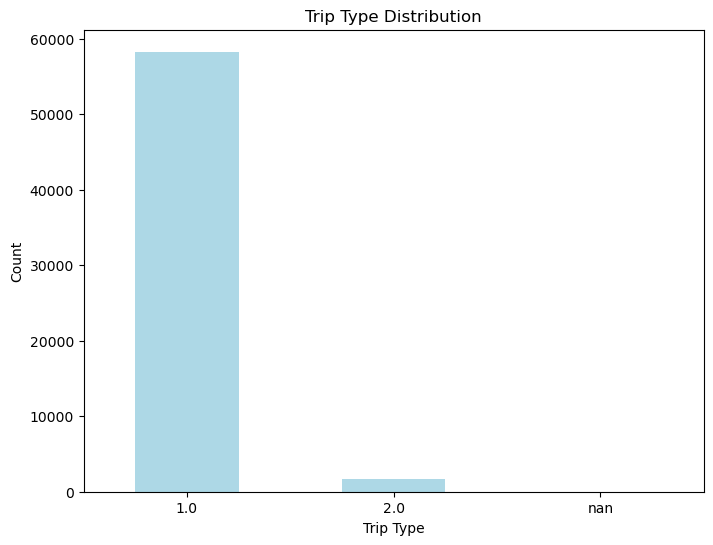

In [11]:
import matplotlib.pyplot as mpl

trip_type_counts = tripdata_df['trip_type'].value_counts()

mpl.figure(figsize=(8, 6))
trip_type_counts.plot(kind='bar', color='lightblue')
mpl.title('Trip Type Distribution')
mpl.xlabel('Trip Type')
mpl.ylabel('Count')
mpl.xticks(rotation=0)
mpl.show()

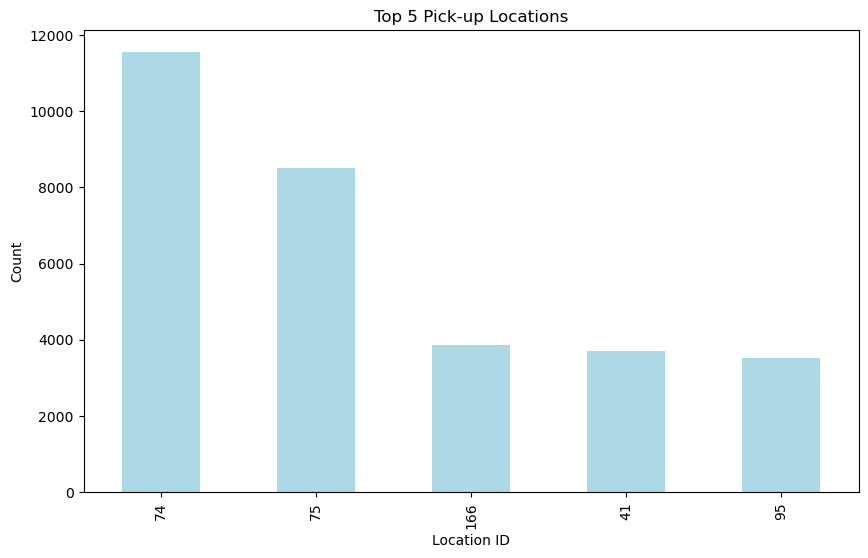

In [12]:
top_pickup_locations = tripdata_df['PULocationID'].value_counts().nlargest(5)

# Plot a bar chart
mpl.figure(figsize=(10, 6))
top_pickup_locations.plot(kind='bar', color='lightblue')
mpl.title('Top 5 Pick-up Locations')
mpl.xlabel('Location ID')
mpl.ylabel('Count')
mpl.show()

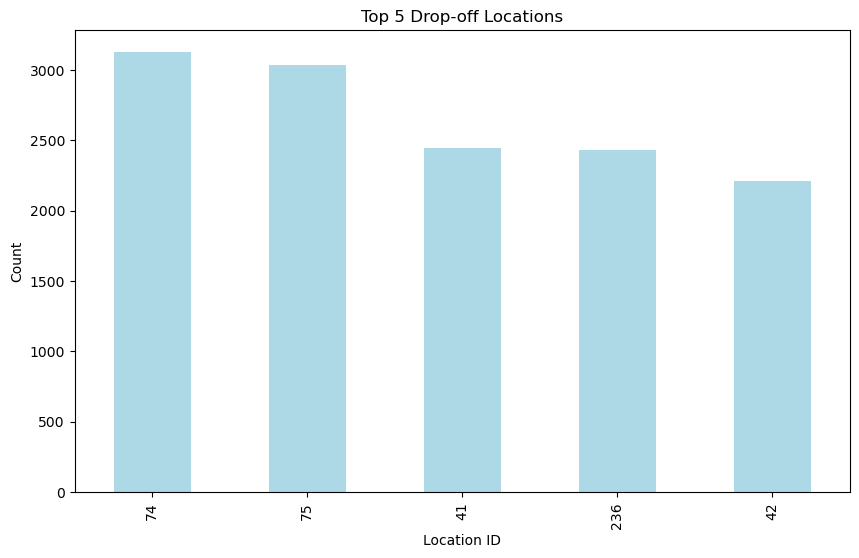

In [13]:
top_dropoff_locations = tripdata_df['DOLocationID'].value_counts().nlargest(5)

# Plot a bar chart
mpl.figure(figsize=(10, 6))
top_dropoff_locations.plot(kind='bar', color='lightblue')
mpl.title('Top 5 Drop-off Locations')
mpl.xlabel('Location ID')
mpl.ylabel('Count')
mpl.show()

## 7. Data Analysis (10 pts)
Write suitable code to answer the following:
1. On average, how far do New Yorkers usually travel using these taxis?
2. What is the most expensive and least expensive trip? 
3. What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)? 

Explain the results.

In [14]:
average_trip_distance = tripdata_df['trip_distance'].mean()
print("Average Trip Distance:", average_trip_distance)

Average Trip Distance: 2.70382026405281


In [16]:
max_total_amount = tripdata_df['total_amount'].max()
min_total_amount = tripdata_df['total_amount'].min()
print("Most Expensive Trip:", max_total_amount)
print("Least Expensive Trip:", min_total_amount)

Most Expensive Trip: 441.0
Least Expensive Trip: -68.0


In [17]:
under_2_miles = tripdata_df[tripdata_df['trip_distance'] < 2]
over_2_miles = tripdata_df[tripdata_df['trip_distance'] >= 2]
min_tip_under_2 = under_2_miles['tip_amount'].min()
avg_tip_under_2 = under_2_miles['tip_amount'].mean()
max_tip_under_2 = under_2_miles['tip_amount'].max()
min_tip_over_2 = over_2_miles['tip_amount'].min()
avg_tip_over_2 = over_2_miles['tip_amount'].mean()
max_tip_over_2 = over_2_miles['tip_amount'].max()

print("For trips under 2 miles:")
print("Minimum Tip Amount:", min_tip_under_2)
print("Average Tip Amount:", avg_tip_under_2)
print("Maximum Tip Amount:", max_tip_under_2)

print("\nFor trips 2 miles and over:")
print("Minimum Tip Amount:", min_tip_over_2)
print("Average Tip Amount:", avg_tip_over_2)
print("Maximum Tip Amount:", max_tip_over_2)

For trips under 2 miles:
Minimum Tip Amount: -0.9
Average Tip Amount: 1.3186187494327977
Maximum Tip Amount: 80.0

For trips 2 miles and over:
Minimum Tip Amount: 0.0
Average Tip Amount: 2.9913816791058627
Maximum Tip Amount: 75.82


## 8. Findings (3 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

In [18]:
print("No, I don't think this data is a viable source.")
print("For one, about 500/6400 rows had a lot of null values.")
print("Secondly based on some of these outputs, there are invalid inputs.")
print("For price and tip etc.")

No, I don't think this data is a viable source.
For one, about 500/6400 rows had a lot of null values.
Secondly based on some of these outputs, there are invalid inputs.
For price and tip etc.
